Combine the APOKASC sample with the Bruntt sample from Chaplin 2014 and the precise sample in Silva-Aguirre (2016).

APOKASC: https://arxiv.org/abs/1710.06858

apokasc_table3.txt: Seismic properties of the APOKASC dwarfs sample

apokasc_table4.txt: Stellar fundamental parameters based on the SDSS Teff scale

apokasc_table5.txt: Stellar fundamental parameters based on the ASPCAP Teff scale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Compare the values from Bruntt in Chaplin with the values from the APOKASC.

Update Chaplin table with Bruntt table.

In [2]:
chaplin_params = pd.read_csv("data/table4_stellar_sdss.csv")
chaplin_obs = pd.read_csv("data/table1_seismic.csv")
chaplin = pd.merge(chaplin_params, chaplin_obs, on="kepid")
chaplin["teff"] = chaplin.sdss_teff
chaplin["teff_err"] = chaplin.sdss_teff_err
bruntt_params = pd.read_csv("data/table6_stellar_bruntt.csv")
bruntt_obs = pd.read_csv("data/table2_seismic_bruntt.csv")
bruntt = pd.merge(bruntt_params, bruntt_obs, on="kepid")
bruntt.keys()

Index(['kepid', 'mass', 'mass_errm', 'mass_errp', 'radius', 'radius_errp',
       'radius_errm', 'rho', 'rho_errp', 'rho_errm', 'logg', 'logg_errp',
       'logg_errm', 'age', 'age_errp', 'age_errm', 'numax', 'numax_err', 'dnu',
       'dnu_err', 'bruntt_teff', 'bruntt_teff_err', 'feh', 'feh_err'],
      dtype='object')

In [3]:
nstar = len(chaplin.kepid.values)
chaplin["bruntt_teff"] = np.ones(nstar)*np.nan
chaplin["bruntt_teff_err"] = np.ones(nstar)*np.nan
bruntt["teff"] = bruntt.bruntt_teff
bruntt["teff_err"] = bruntt.bruntt_teff_err
 
for i, kepid in enumerate(bruntt.kepid.values):
    m = kepid == chaplin.kepid.values
    print(i, "of", len(bruntt.kepid.values))
    for key in bruntt.keys():
        chaplin["{}".format(key)].iloc[m] = bruntt["{}".format(key)].iloc[i]

0 of 87


/Users/ruthangus/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1 of 87
2 of 87
3 of 87
4 of 87
5 of 87
6 of 87
7 of 87
8 of 87
9 of 87
10 of 87
11 of 87
12 of 87
13 of 87
14 of 87
15 of 87
16 of 87
17 of 87
18 of 87
19 of 87
20 of 87
21 of 87
22 of 87
23 of 87
24 of 87
25 of 87
26 of 87
27 of 87
28 of 87
29 of 87
30 of 87
31 of 87
32 of 87
33 of 87
34 of 87
35 of 87
36 of 87
37 of 87
38 of 87
39 of 87
40 of 87
41 of 87
42 of 87
43 of 87
44 of 87
45 of 87
46 of 87
47 of 87
48 of 87
49 of 87
50 of 87
51 of 87
52 of 87
53 of 87
54 of 87
55 of 87
56 of 87
57 of 87
58 of 87
59 of 87
60 of 87
61 of 87
62 of 87
63 of 87
64 of 87
65 of 87
66 of 87
67 of 87
68 of 87
69 of 87
70 of 87
71 of 87
72 of 87
73 of 87
74 of 87
75 of 87
76 of 87
77 of 87
78 of 87
79 of 87
80 of 87
81 of 87
82 of 87
83 of 87
84 of 87
85 of 87
86 of 87


In [4]:
chaplin.keys()

Index(['kepid', 'mass', 'mass_errp', 'mass_errm', 'radius', 'radius_errp',
       'radius_errm', 'rho', 'rho_errp', 'rho_errm', 'logg', 'logg_errp',
       'logg_errm', 'age', 'age_errp', 'age_errm', 'numax', 'numax_err', 'dnu',
       'dnu_err', 'sdss_teff', 'sdss_teff_err', 'irfm_teff', 'irfm_teff_err',
       'feh', 'feh_err', 'teff', 'teff_err', 'bruntt_teff', 'bruntt_teff_err'],
      dtype='object')

(4500, 7500)

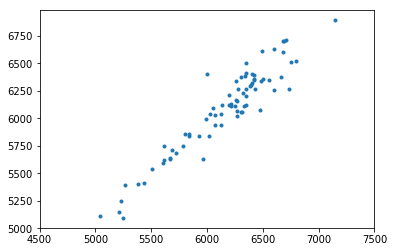

In [5]:
plt.plot(chaplin.sdss_teff, chaplin.bruntt_teff, ".")
plt.xlim(4500, 7500)

Update Chaplin table with Silva-Aguirre table

In [6]:
sa_params = pd.read_csv("data/silva-aguirre_table4.tsv", skiprows=91)
m = sa_params.Pipe.values == "AST"
sa_params = sa_params.iloc[m]
sa_obs = pd.read_csv("data/silva-aguirre_table3.tsv", skiprows=67)
sa = pd.merge(sa_params, sa_obs, on="kepid")
sa["dnu_err"] = .5*(sa.dnu_errp.values + sa.dnu_errm.values)
sa["numax_err"] = .5*(sa.numax_errp.values + sa.numax_errm.values)
sa.keys()

Index(['Pipe', 'kepid', 'mass', 'mass_errp', 'mass_errm', 'radius',
       'radius_errp', 'radius_errm', 'logg', 'logg_errp', 'logg_errm', 'age',
       'age_errp', 'age_errm', 'lum', 'lum_errp', 'lum_errm', 'rho',
       'rho_errp', 'rho_errm', 'dist', 'dist_errp', 'dist_errm', 'Xini',
       'Yini', 'Xsup', 'Ysup', 'Xcen', 'Ycen', 'MCcore', 'Rbce', 'alpha',
       'TAMS', 'numax', 'numax_errp', 'numax_errm', 'dnu', 'dnu_errp',
       'dnu_errm', 'teff', 'teff_err', 'feh', 'feh_err', 'Ref', 'PapI', 'KCat',
       'Simbad', '_RA', '_DE', 'dnu_err', 'numax_err'],
      dtype='object')

In [7]:
chaplin.keys()

Index(['kepid', 'mass', 'mass_errp', 'mass_errm', 'radius', 'radius_errp',
       'radius_errm', 'rho', 'rho_errp', 'rho_errm', 'logg', 'logg_errp',
       'logg_errm', 'age', 'age_errp', 'age_errm', 'numax', 'numax_err', 'dnu',
       'dnu_err', 'sdss_teff', 'sdss_teff_err', 'irfm_teff', 'irfm_teff_err',
       'feh', 'feh_err', 'teff', 'teff_err', 'bruntt_teff', 'bruntt_teff_err'],
      dtype='object')

In [8]:
chaplin["sa_teff"] = np.ones(nstar)*np.nan
chaplin["sa_teff_err"] = np.ones(nstar)*np.nan
sa["sa_teff"] = sa.teff
sa["sa_teff_err"] = sa.teff_err

for i, kepid in enumerate(sa.kepid.values):
    m = kepid == chaplin.kepid.values
    print(i, "of", len(sa.kepid.values))
    for key in chaplin.keys():
        try:
            chaplin["{}".format(key)].iloc[m] = sa["{}".format(key)].iloc[i]
        except:
            pass

0 of 66


/Users/ruthangus/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1 of 66
2 of 66
3 of 66
4 of 66
5 of 66
6 of 66
7 of 66
8 of 66
9 of 66
10 of 66
11 of 66
12 of 66
13 of 66
14 of 66
15 of 66
16 of 66
17 of 66
18 of 66
19 of 66
20 of 66
21 of 66
22 of 66
23 of 66
24 of 66
25 of 66
26 of 66
27 of 66
28 of 66
29 of 66
30 of 66
31 of 66
32 of 66
33 of 66
34 of 66
35 of 66
36 of 66
37 of 66
38 of 66
39 of 66
40 of 66
41 of 66
42 of 66
43 of 66
44 of 66
45 of 66
46 of 66
47 of 66
48 of 66
49 of 66
50 of 66
51 of 66
52 of 66
53 of 66
54 of 66
55 of 66
56 of 66
57 of 66
58 of 66
59 of 66
60 of 66
61 of 66
62 of 66
63 of 66
64 of 66
65 of 66


(4500, 7500)

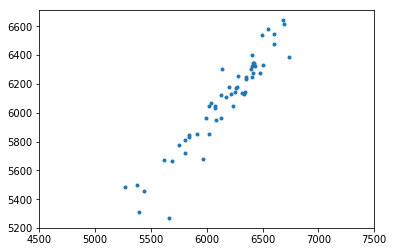

In [9]:
plt.plot(chaplin.sdss_teff, chaplin.sa_teff, ".")
plt.xlim(4500, 7500)

Merge the Chaplin/Bruntt/Silva-Aguirre tables with the ASPCAP table to make comparison plots.

In [10]:
aspcap = pd.read_csv("data/apokasc_table5.txt", skiprows=42)
aspcap.keys()

Index(['kepid', 'teff', 'teff_err', 'M_H', 'M_H_err', 'rad', 'rad_errp',
       'rad_errm', 'rad_sys_err', 'mass', 'mass_errp', 'mass_errm',
       'mass_sys_err', 'logg', 'logg_errp', 'logg_errm', 'logg_sys_err', 'rho',
       'rho_errp', 'rho_errm', 'rho_sys_err', 'age', 'age_errp', 'age_errm',
       'age_sys_err'],
      dtype='object')

Merge tables

In [11]:
df = pd.merge(aspcap, chaplin, on="kepid", how="outer", suffixes=["_aspcap", "_chaplin"])
df.keys()

Index(['kepid', 'teff_aspcap', 'teff_err_aspcap', 'M_H', 'M_H_err', 'rad',
       'rad_errp', 'rad_errm', 'rad_sys_err', 'mass_aspcap',
       'mass_errp_aspcap', 'mass_errm_aspcap', 'mass_sys_err', 'logg_aspcap',
       'logg_errp_aspcap', 'logg_errm_aspcap', 'logg_sys_err', 'rho_aspcap',
       'rho_errp_aspcap', 'rho_errm_aspcap', 'rho_sys_err', 'age_aspcap',
       'age_errp_aspcap', 'age_errm_aspcap', 'age_sys_err', 'mass_chaplin',
       'mass_errp_chaplin', 'mass_errm_chaplin', 'radius', 'radius_errp',
       'radius_errm', 'rho_chaplin', 'rho_errp_chaplin', 'rho_errm_chaplin',
       'logg_chaplin', 'logg_errp_chaplin', 'logg_errm_chaplin', 'age_chaplin',
       'age_errp_chaplin', 'age_errm_chaplin', 'numax', 'numax_err', 'dnu',
       'dnu_err', 'sdss_teff', 'sdss_teff_err', 'irfm_teff', 'irfm_teff_err',
       'feh', 'feh_err', 'teff_chaplin', 'teff_err_chaplin', 'bruntt_teff',
       'bruntt_teff_err', 'sa_teff', 'sa_teff_err'],
      dtype='object')

(4500, 7500)

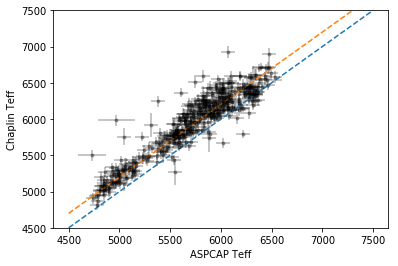

In [12]:
plt.errorbar(df.teff_aspcap, df.teff_chaplin, xerr=df.teff_err_aspcap, yerr=df.teff_err_chaplin, fmt="k.", alpha=.3)
x = np.linspace(4500, 7500, 100)
plt.plot(x, x, "--")
plt.plot(x, x+200, "--")
plt.xlabel("ASPCAP Teff")
plt.ylabel("Chaplin Teff")
plt.ylim(4500, 7500)

(4500, 7500)

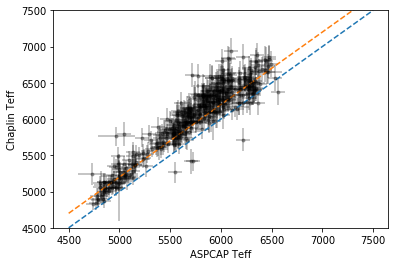

In [13]:
plt.errorbar(df.teff_aspcap, df.irfm_teff, xerr=df.teff_err_aspcap, yerr=df.irfm_teff_err, fmt="k.", alpha=.3)
x = np.linspace(4500, 7500, 100)
plt.plot(x, x, "--")
plt.plot(x, x+200, "--")
plt.xlabel("ASPCAP Teff")
plt.ylabel("Chaplin Teff")
plt.ylim(4500, 7500)

Looks like a discrepancy in Teff of at least 100K.

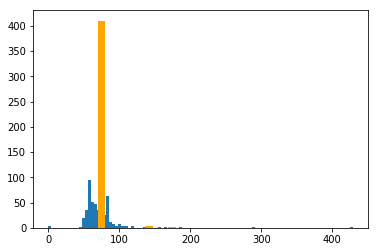

In [14]:
plt.hist(df.teff_err_chaplin.values[np.isfinite(df.teff_err_chaplin.values)], 100);
plt.hist(df.teff_err_aspcap[np.isfinite(df.teff_err_aspcap.values)], color="orange");

In [15]:
df.keys()

Index(['kepid', 'teff_aspcap', 'teff_err_aspcap', 'M_H', 'M_H_err', 'rad',
       'rad_errp', 'rad_errm', 'rad_sys_err', 'mass_aspcap',
       'mass_errp_aspcap', 'mass_errm_aspcap', 'mass_sys_err', 'logg_aspcap',
       'logg_errp_aspcap', 'logg_errm_aspcap', 'logg_sys_err', 'rho_aspcap',
       'rho_errp_aspcap', 'rho_errm_aspcap', 'rho_sys_err', 'age_aspcap',
       'age_errp_aspcap', 'age_errm_aspcap', 'age_sys_err', 'mass_chaplin',
       'mass_errp_chaplin', 'mass_errm_chaplin', 'radius', 'radius_errp',
       'radius_errm', 'rho_chaplin', 'rho_errp_chaplin', 'rho_errm_chaplin',
       'logg_chaplin', 'logg_errp_chaplin', 'logg_errm_chaplin', 'age_chaplin',
       'age_errp_chaplin', 'age_errm_chaplin', 'numax', 'numax_err', 'dnu',
       'dnu_err', 'sdss_teff', 'sdss_teff_err', 'irfm_teff', 'irfm_teff_err',
       'feh', 'feh_err', 'teff_chaplin', 'teff_err_chaplin', 'bruntt_teff',
       'bruntt_teff_err', 'sa_teff', 'sa_teff_err'],
      dtype='object')

Text(0,0.5,'Chaplin mass')

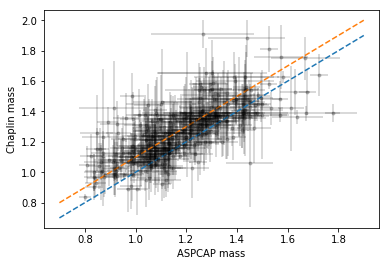

In [16]:
plt.errorbar(df.mass_aspcap, df.mass_chaplin, xerr=df.mass_errp_aspcap, 
             yerr=df.mass_errp_chaplin, fmt="k.", alpha=.2)
x = np.linspace(.7, 1.9, 100)
plt.plot(x, x, "--")
plt.plot(x, x+.1, "--")
plt.xlabel("ASPCAP mass")
plt.ylabel("Chaplin mass")

Systematically off by about .1 Solar masses.

In [17]:
df.to_csv("combined_astero_catalogue.csv")

In [18]:
df.keys()

Index(['kepid', 'teff_aspcap', 'teff_err_aspcap', 'M_H', 'M_H_err', 'rad',
       'rad_errp', 'rad_errm', 'rad_sys_err', 'mass_aspcap',
       'mass_errp_aspcap', 'mass_errm_aspcap', 'mass_sys_err', 'logg_aspcap',
       'logg_errp_aspcap', 'logg_errm_aspcap', 'logg_sys_err', 'rho_aspcap',
       'rho_errp_aspcap', 'rho_errm_aspcap', 'rho_sys_err', 'age_aspcap',
       'age_errp_aspcap', 'age_errm_aspcap', 'age_sys_err', 'mass_chaplin',
       'mass_errp_chaplin', 'mass_errm_chaplin', 'radius', 'radius_errp',
       'radius_errm', 'rho_chaplin', 'rho_errp_chaplin', 'rho_errm_chaplin',
       'logg_chaplin', 'logg_errp_chaplin', 'logg_errm_chaplin', 'age_chaplin',
       'age_errp_chaplin', 'age_errm_chaplin', 'numax', 'numax_err', 'dnu',
       'dnu_err', 'sdss_teff', 'sdss_teff_err', 'irfm_teff', 'irfm_teff_err',
       'feh', 'feh_err', 'teff_chaplin', 'teff_err_chaplin', 'bruntt_teff',
       'bruntt_teff_err', 'sa_teff', 'sa_teff_err'],
      dtype='object')

In [19]:
np.shape(df)

(525, 56)

Download the light curves for these stars.

In [20]:
#import kplr
#client = kplr.API()

#for kepid in df.kepid.values:
#    star = client.star(kepid)
#    star.get_light_curves(fetch=True, short_cadence=True)

Make a dataframe containing just the labels I want to train on.

In [21]:
training = pd.DataFrame(dict({"kepid": df.kepid, "teff": df.teff_chaplin, "logg": df.logg_chaplin, "feh": df.feh, 
                             "dnu": df.dnu, "numax": df.numax, "mass": df.mass_chaplin, "radius": df.radius,
                             "age": df.age_chaplin}))

In [22]:
training.to_csv("training_labels.csv")

In [23]:
kepids = pd.DataFrame(dict({"kepid": df.kepid}))
kepids.to_csv("kepids.csv")